In [2]:
import os.path
import time
import pylab as pl
import numpy as np
from scipy import rand
from scipy.io import loadmat
%pylab inline
import os
import time
from scipy.io import savemat, loadmat
from numpy import *
import copy
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
import scipy
from scipy.signal import savgol_filter
from scipy.signal import argrelextrema
from scipy.signal import find_peaks_cwt
from scipy.signal import find_peaks
from scipy import interpolate
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
sns.set()

Populating the interactive namespace from numpy and matplotlib


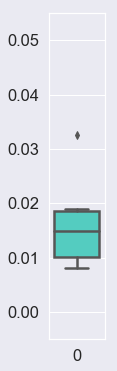

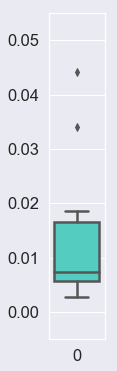

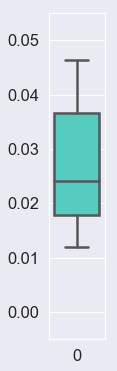

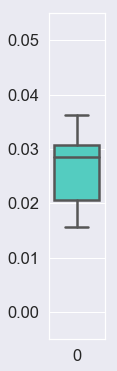

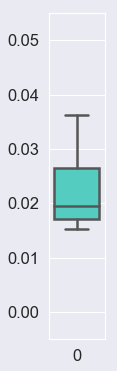

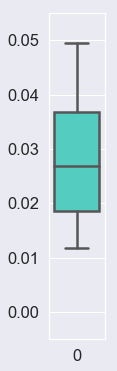

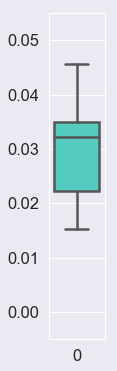

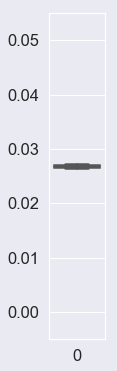

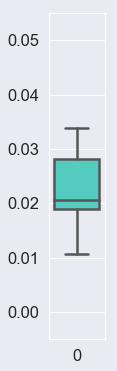

In [8]:
##########################################
dSets = ['gems_no_nuc','GEMS-grace_new2_WT']
dx = 0.11029266566038132
##########################################
nest = {}
dtDict = {}
vids = {}
counter = 0
counterCell = 0
tipCounter = 0
totalHy = 0
allDiffs = []
diffsTips = []
ratioTipToAll = []
allWeights = []
weightsTips = []
for d in dSets:  
    ##########################################
    if d == 'gems_no_nuc':
        dtDict[d] = {'1x_gems_noNuc007': 0.8597241044044495,
                     '1x_gems_noNuc005': 0.86404949426651,
                     '1x_gems_noNuc019': 0.8585525751113892}
    if d == 'GEMS-grace_new2_WT':
        dtDict[d] = {'gems_wtNoNuc011': 0.8837366104125977, 
                     'gems_wtNoNuc025': 0.9058094620704651, 
                     'gems_wtNoNuc013': 0.88719642162323, 
                     'gems_wtNoNuc027': 0.8751857280731201, 
                     'gems_wtNoNuc033': 0.8615732192993164, 
                     'gems_wtNoNuc017': 0.8966847062110901, 
                     'gems_wtNoNuc031': 0.8911741971969604, 
                     'gems_wtNoNuc023': 0.9057651162147522, 
                     'gems_wtNoNuc019': 0.8688925504684448, 
                     'gems_wtNoNuc029': 0.8644909262657166, 
                     'gems_wtNoNuc021': 0.8623786568641663, 
                     'gems_wtNoNuc009': 0.858651340007782, 
                     'gems_wtNoNuc007': 0.8886678218841553, 
                     'gems_wtNoNuc005': 0.8625732660293579, 
                     'gems_wtNoNuc003': 0.8593537211418152, 
                     'gems_wtNoNuc015': 0.8786670565605164, 
                     'gems_wtNoNuc001': 0.8855053186416626}
    ########################################### 
    nest[d] = np.load('axialData-{0}.npy'.format(d), allow_pickle=True,
               encoding='latin1')[0] #file was made w/ python 2
#     nest[d] = np.load('axialDataLinkerModified-{0}.npy'.format(d), allow_pickle=True,
#                encoding='latin1')[0] #file was made w/ python 2
    vids[d] = nest[d].keys()
    sorted(vids[d])
    ######################################################################
    ######################################################################
    ### hand chosen videos and time point:
    if d == 'gems_no_nuc':
        vidSub = ['1x_gems_noNuc005','1x_gems_noNuc007','1x_gems_noNuc019']
        frame = 50
    if d == 'GEMS-grace_new2_WT':
        vidSub = ['gems_wtNoNuc005','gems_wtNoNuc007','gems_wtNoNuc009','gems_wtNoNuc013',
                  'gems_wtNoNuc023','gems_wtNoNuc025'] 
        frame = 50
    ########## 
    for v in vidSub: 
        counter += 1
        diffFromCell = []
        hyDiffFromCell = []
        hyCVFromCell = []
        counterHy = 0
        for hy in arange(len(nest[d][v]['diffusivity'])): 
            tipLoc = []
            idxTip = []
            diffs = []
            if v == '1x_gems_noNuc019':
                if hy == 5:
                    continue
            if len(nest[d][v]['diffusivity'][hy]) == 1:
                continue
            diffsZeros = nest[d][v]['diffusivity'][hy][frame,:]*dx**2/dtDict[d][v]                                                                                     
            diffs = array([i for i in diffsZeros if i!=0]) 
            AL = abs(nest[d][v]['arcLength'][hy])*dx 
            if len(diffsZeros) == 0: 
                continue
            if len(nest[d][v]['arcLength'][hy]) < 10: 
                continue
            #############################################################
            ### x,y positions of beginning and end of medial axis signal:
            x0 = truncate(nest[d][v]['axisPosition'][hy][0][0],1)
            xEnd = truncate(nest[d][v]['axisPosition'][hy][0][-1],1)
            y0 = truncate(nest[d][v]['axisPosition'][hy][1][0],1)
            yEnd = truncate(nest[d][v]['axisPosition'][hy][1][-1],1)
            ##############################################################
            ### getting weights based on distances b/w medial axis points:
            diffAL = np.diff(AL) #distance b/w medial axis points
            weights = np.zeros(len(AL))
            weights[0] = diffAL[0] #beginning and end points are weighted by neighboring 
            weights[-1] = diffAL[-1]                                           #distance
            for i, val in enumerate(weights[1:-1],1): #middle points weighted by average of
                weights[i] = (diffAL[i-1] + diffAL[i])/2   #their two neighboring distances
            ###############################################################################
            ### data for fig 3 and 4
            diffFromCell = append(diffFromCell,diffs) #diffusivity values from all hypha in
                                                                              #current cell
            hyDiffFromCell = append(hyDiffFromCell,np.average(diffs,weights=weights)) #average
                                                               #diffusivity in hypha, weighted
            hyCVFromCell = append(hyCVFromCell,np.std(diffs)/np.average(diffs,weights=weights))                                                                                
            allDiffs = append(allDiffs,diffs) #all diffusivity values from all cells
            allWeights = append(allWeights,weights)
            #################################################
            #### Hand segmented medial axis location of tips:
            if v == 'gems_wtNoNuc025':
                tipLoc = []
            if v == 'gems_wtNoNuc023':
                tipLoc = []
            if v == 'gems_wtNoNuc013':
                if counterHy == 0:
                    tipLoc = 0
                if counterHy == 1:
                    tipLoc = []
                if counterHy == 2:
                    tipLoc = -1
                if counterHy == 3:
                    tipLoc = []
                if counterHy == 4:
                    tipLoc = -1
                if counterHy == 5:
                    tipLoc = []
            if v == 'gems_wtNoNuc009':
                if counterHy == 0:
                    tipLoc = 0
                if counterHy == 1:
                    tipLoc = []
                if counterHy == 2:
                    tipLoc = []
                if counterHy == 3:
                    tipLoc = -1
                if counterHy == 4:
                    tipLoc = 0
                if counterHy == 5:
                    tipLoc = 0
                if counterHy == 6:
                    tipLoc = -1
                if counterHy == 7:
                    tipLoc = -1
                if counterHy == 8:
                    tipLoc = -1
                if counterHy == 9:
                    tipLoc = -1
                if counterHy == 10:
                    tipLoc = -1
                if counterHy == 11:
                    tipLoc = 0
                if counterHy == 12:
                    tipLoc = 0
                if counterHy == 13:
                    tipLoc = 0
            if v == 'gems_wtNoNuc007':
                if counterHy == 0:
                    tipLoc = []
                if counterHy == 1:
                    tipLoc = -1
                if counterHy == 2:
                    tipLoc = 0
                if counterHy == 3:
                    tipLoc = []
                if counterHy == 4:
                    tipLoc = 0
                if counterHy == 5:
                    tipLoc = -1
                if counterHy == 6:
                    tipLoc = []
            if v == 'gems_wtNoNuc005':
                if counterHy == 0:
                    tipLoc = 0
                if counterHy == 1:
                    tipLoc = 0
                if counterHy == 2:
                    tipLoc = 0
                if counterHy == 3:
                    tipLoc = -1
                if counterHy == 4:
                    tipLoc = 0
                if counterHy == 5:
                    tipLoc = 0
            if v == '1x_gems_noNuc019':
                if counterHy == 0:
                    tipLoc = -1
                if counterHy == 1:
                    tipLoc = []
                if counterHy == 2:
                    tipLoc = -1
                if counterHy == 3:
                    tipLoc = -1
                if counterHy == 4:
                    tipLoc = 0
                if counterHy == 5:
                    tipLoc = []
            if v == '1x_gems_noNuc005':
                if counterHy == 0:
                    tipLoc = 0
                if counterHy == 1:
                    tipLoc = 0
                if counterHy == 2:
                    tipLoc = 0
                if counterHy == 3:
                    tipLoc = 0
                if counterHy == 4:
                    tipLoc = []
                if counterHy == 5:
                    tipLoc = -1
            if v == '1x_gems_noNuc007':
                if counterHy == 0:
                    tipLoc = 0
                if counterHy == 1:
                    tipLoc = 0
                if counterHy == 2:
                    tipLoc = 0
                if counterHy == 3:
                    tipLoc = 0
                if counterHy == 4:
                    tipLoc = 0
                if counterHy == 5:
                    tipLoc = -1
                if counterHy == 6:
                    tipLoc = []
                if counterHy == 7:
                    tipLoc = []
                if counterHy == 8:
                    tipLoc = 0
                if counterHy == 9:
                    tipLoc = []
#             if tipLoc != []:
#                 scatter(AL[tipLoc],0,color='r',s=200)
            #######################################################
            ### data for fig 4:
            if tipLoc == 0: #if tip is the beginning of medial axis signal:
                idxTip = AL < (AL[tipLoc]+1) #getting AL incidices of tip region, first um
                                                                                #of signal 
                tipCounter += 1
                diffsTips = append(diffsTips,diffs[idxTip]) #diffusivity values at tips,
                                                                              #all cells
                weightsTips = append(weightsTips,weights[idxTip])
                ratioTipToAll = append(ratioTipToAll,np.average(diffs[idxTip], 
                                        weights=weights[idxTip])/np.average(diffs,
                                                                            weights=weights))
#                 fig = plt.figure(figsize=(8,3))
#                 plot(AL, diffsZeros, linewidth=3,color=[0.35,0.35,0.35])
#                 plot(AL[idxTip], diffsZeros[idxTip], linewidth=2,c='r')
            if tipLoc == -1: #if tip is the end of medial axis signal:
                idxTip = AL > (AL[tipLoc]-1) #getting AL incidices of tip region, last um 
                                                                               #of signal
                tipCounter += 1
                diffsTips = append(diffsTips,diffs[idxTip])
                weightsTips = append(weightsTips,weights[idxTip])
                ratioTipToAll = append(ratioTipToAll,np.average(diffs[idxTip], 
                                        weights=weights[idxTip])/np.average(diffs,
                                                                            weights=weights))
#                 fig = plt.figure(figsize=(8,3))
#                 plot(AL, diffsZeros, linewidth=3,color=[0.35,0.35,0.35])
#                 plot(AL[idxTip], diffsZeros[idxTip], linewidth=2,c='r')
            if tipLoc == []: #if the medial axis signal does not contain a tip:
                idxTip = []
            ############################
            ### medial axis plots for figs 3B and 4A
#             fig = plt.figure(figsize=(8,3)) 
#             fig.patch.set_facecolor('xkcd:white')
#             sns.set(font_scale=1.5)
#             xlabel('medial axis (um)')
#             ylabel('diffusivity (um^2/s)')
#             title('Average diffusivity medial axis projection, {0},{1}, x0:{2}, y0:{3}, xEnd:{4},yEnd:{5}, hy:{6}'.format(d,v,x0,y0,xEnd,yEnd,counterHy))
#             xlim([0,70]) #for fig 3B and 4D
            ### 4D:
#             ylim([-0.008,0.045]) 
#             plot(AL, diffsZeros, linewidth=5,color=[0.35,0.35,0.35]) 
#             fig.savefig('medAxis{0}{1}{2}.pdf'.format(d,v,counterHy)) 
            ### 3B:  
#             ylim([-0.0065,0.03]) 
#             plot(AL, diffsZeros, linewidth=3,color=[0.35,0.35,0.35]) #fig 4D: lw 4, B: 5
#             fig.savefig('medAxisLong{0}{1}{2}.pdf'.format(d,v,counterHy)) #for fig 3B
            #############################
            counterHy += 1
            totalHy += 1
            ###############
        counterCell += 1
        #################
        ### for fig 3D-F:
        fig = plt.figure(figsize=(1,6)) 
        fig.patch.set_facecolor([0.918,0.918,0.949])
        ###########
        ### fig 3D:
#         ax = sns.violinplot(data=np.log10(diffFromCell),color='deepskyblue',linewidth=2.5,
#                                                                 scale='area', inner='box') 
# #         ax = sns.boxplot(data=np.log10(diffFromCell),color='deepskyblue', orient='vert',
# #                                                                linewidth=2.5)
#         yticks([np.log10(0.001), np.log10(0.01), np.log10(0.1)])
#         plt.ylim([-3.5,-0.7])
# #         plt.ylim([-0.02,0.1])
#         fig.savefig('diffFromCell{0}.pdf'.format(counter))
#         print(len(diffFromCell))
#         print(counterHy)
        ###########
        ## fig 3F:
#         ax = sns.boxplot(data=hyCVFromCell,color=[0.984, 0.8, 0.337],orient='vert',
#                                                                        linewidth=2.5)
#         plt.ylim([-0.08,0.75])
#         fig.savefig('cvFromHy{0}.pdf'.format(counter))
#         title('cell#{0},n hy={1}'.format(counterCell,len(hyCVFromCell)))
        ###########
        ### fig 3E:
        ax = sns.boxplot(data=hyDiffFromCell,color='turquoise',orient='vert',linewidth=2.5)
        plt.ylim([-0.005,0.055])
#         plt.ylim([-0.02,0.1])
        fig.savefig('diffFromHy{0}.pdf'.format(counter))

In [24]:
totalHy

64

mean:
0.023421387737743157
n:
8558
std:
0.015462938683572364


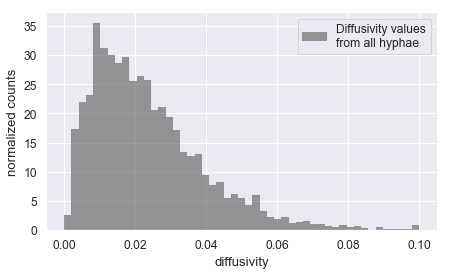

In [9]:
### fig 3C:
fig = plt.figure(1,figsize=(7,4))
sns.set(font_scale=1.1)
######
plt.hist(np.clip(allDiffs,0,0.1),color=[0.35,0.35,0.35],bins=linspace(0,0.1,50),lw=0.4,alpha=.6,
         weights=allWeights,density=True,histtype='stepfilled', linewidth=0.05,
         edgecolor=[0.55,0.55,0.55],label='Diffusivity values\nfrom all hyphae')
######
plt.legend()
xlabel('diffusivity')
ylabel('normalized counts')
fig.savefig('allDiffsNoTips.pdf')
###
print('mean:')
print(np.mean(allDiffs))
print('n:')
print(len(allDiffs))
print('std:')
print(std(allDiffs))

mean all:
0.023421387737743157
n all:
8558
mean tips:
0.016419133204054515
n tips:
226


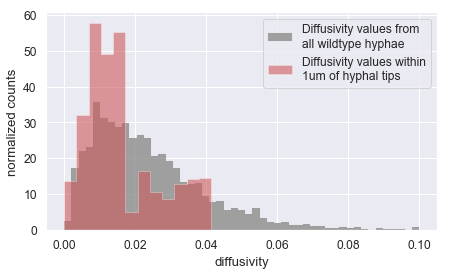

In [11]:
### fig 4E
fig = plt.figure(1,figsize=(7,4))
sns.set(font_scale=1.1)
###########
plt.hist(np.clip(allDiffs,0,0.1),color=[0.55,0.55,0.55],bins=linspace(0,0.1,50),lw=0.4,alpha=.8,
         weights=allWeights,density=True,histtype='stepfilled', linewidth=0.05,
         edgecolor=[0.55,0.55,0.55],label='Diffusivity values from\nall wildtype hyphae')
plt.hist(np.clip(diffsTips,0,0.1),color='indianred',bins=linspace(0,0.1,30),lw=0.4,alpha=0.6,
         weights=weightsTips,density=True,histtype='stepfilled', linewidth=0.5,
         label='Diffusivity values within\n1um of hyphal tips',edgecolor='w')
###########
plt.legend()
xlabel('diffusivity')
ylabel('normalized counts')
fig.savefig('allDiffs.pdf')
###
print('mean all:')
print(np.mean(allDiffs))
print('n all:')
print(len(allDiffs))
print('mean tips:')
print(np.mean(diffsTips))
print('n tips:')
print(len(diffsTips))

mean:
0.686654992820385
n:
41
fraction less than 1:
0.9024390243902439


/Users/gracemclaughlin/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


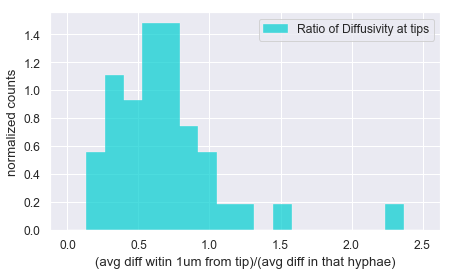

In [12]:
### fig 4F
fig = plt.figure(1,figsize=(7,4))
########
plt.hist(ratioTipToAll,color='darkturquoise',lw=0.4,alpha=0.7,bins=linspace(0,2.5,20),
        histtype='stepfilled',normed=True,label='Ratio of Diffusivity at tips')
########
xlabel('(avg diff witin 1um from tip)/(avg diff in that hyphae)')
ylabel('normalized counts')
fig.savefig('ratio.pdf')
plt.legend()
###
print('mean:')
print(np.mean(ratioTipToAll))
print('n:')
print(len(ratioTipToAll))
print('fraction less than 1:')
print(len(ratioTipToAll[ratioTipToAll<1])/len(ratioTipToAll))
# # plt.legend()